In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_32480\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_32480\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_32480\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 4)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 48 to 24911
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         125 non-null    float64
 1   host_is_superhost          125 non-null    int64  
 2   host_identity_verified     125 non-null    int64  
 3   property_type              125 non-null    int64  
 4   room_type                  125 non-null    int64  
 5   instant_bookable           125 non-null    int64  
 6   accommodates               125 non-null    float64
 7   bathrooms                  125 non-null    float64
 8   price                      125 non-null    float64
 9   review_scores_cleanliness  125 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 10.7 KB


<Axes: xlabel='room_type', ylabel='price'>

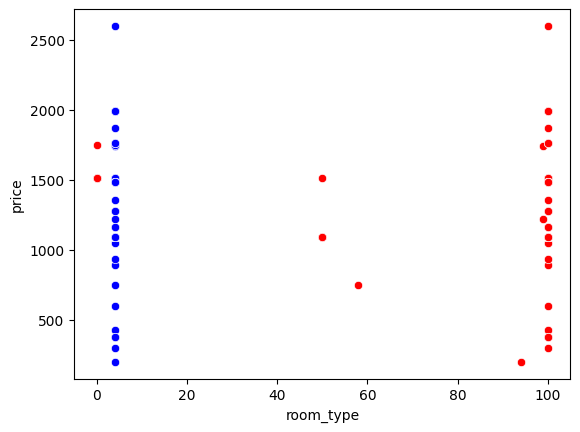

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

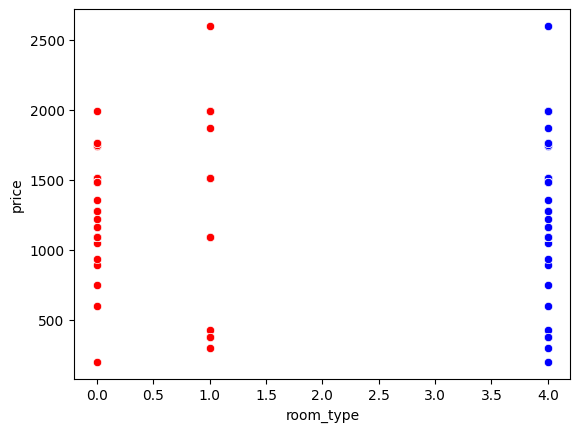

In [8]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

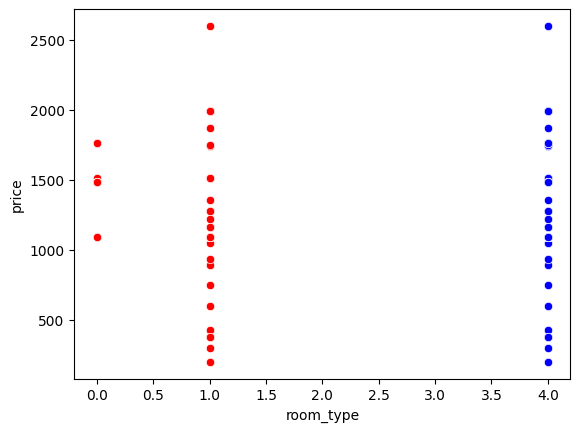

In [9]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

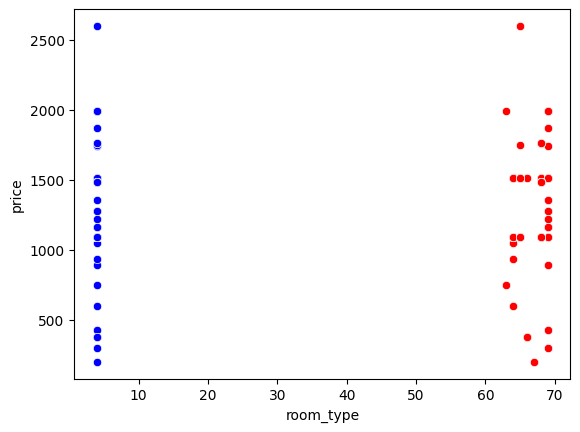

In [10]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

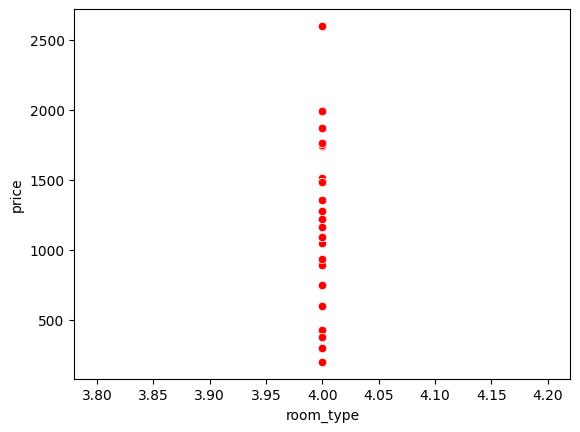

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

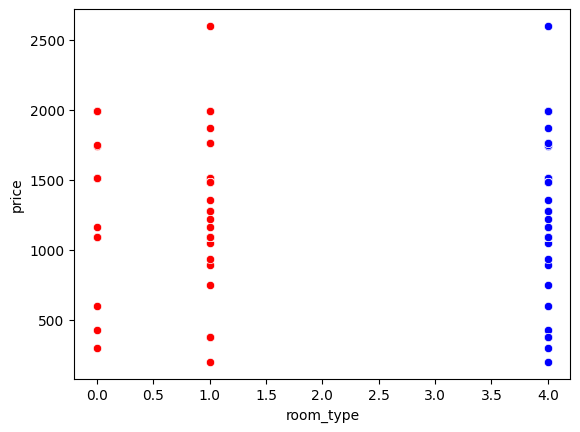

In [12]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

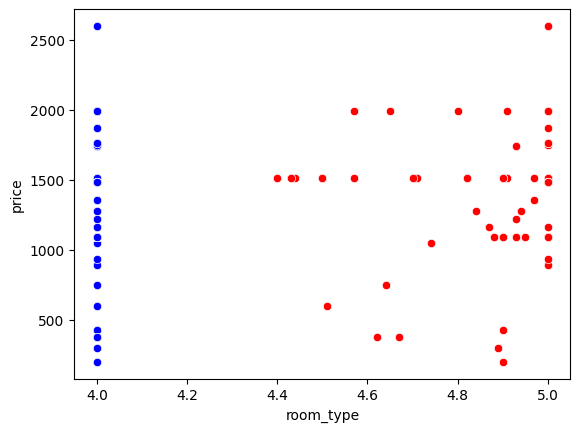

In [13]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

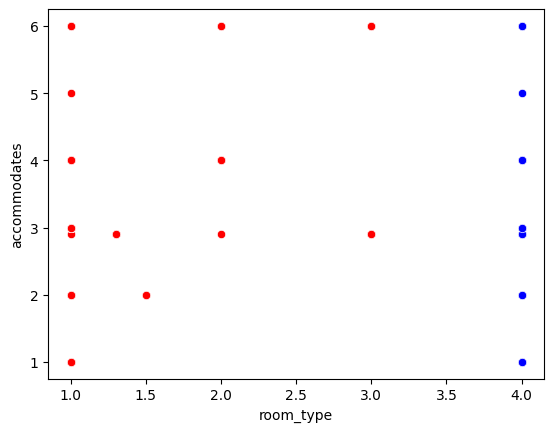

In [14]:
from turtle import color 
sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.25944689]),
 'rank_': 1,
 'singular_': array([282.17370537]),
 'intercept_': np.float64(1406.0327560523476)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([230.30584677]),
 'rank_': 1,
 'singular_': array([4.87934422]),
 'intercept_': np.float64(1232.2129032258067)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1291.1712000000002)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([111.74073529]),
 'rank_': 1,
 'singular_': array([5.21536192]),
 'intercept_': np.float64(1215.1875000000002)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([23.77597967]),
 'rank_': 1,
 'singular_': array([20.8038458]),
 'intercept_': np.float64(-302.7704768946394)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-162.07706735]),
 'rank_': 1,
 'singular_': array([4.33220498]),
 'intercept_': np.float64(1423.4260869565219)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-72.04598667]),
 'rank_': 1,
 'singular_': array([1.66464074]),
 'intercept_': np.float64(1646.1677129014315)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.22337689]),
 'rank_': 1,
 'singular_': array([6.54702375]),
 'intercept_': np.float64(1.3720183503361356)}

**Prediccion de valores**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1281.34751428, 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1332.98483663,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1406.03275605,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1281.34751428,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1406.03275605, 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1406.03275605, 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.08806

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1462.51875   ,
       1232.21290323, 1232.21290323, 1462.51875   , 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290323,
       1232.21290323, 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1232.21290323, 1232.21290323,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1232.21290323, 1462.51875   , 1462.51875   ,
       1232.21290323, 1462.51875   , 1232.21290323, 1232.21290323,
       1232.21290323, 1462.51875   , 1232.21290323, 1232.21290323,
       1232.21290323, 1232.21290323, 1462.51875   , 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1215.1875    , 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([1337.77212015, 1242.66820148, 1242.66820148, 1337.77212015,
       1337.77212015, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1218.89222181, 1337.77212015, 1337.77212015,
       1218.89222181, 1337.77212015, 1337.77212015, 1195.11624214,
       1242.66820148, 1337.77212015, 1337.77212015, 1337.77212015,
       1195.11624214, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1337.77212015, 1242.66820148, 1337.77212015,
       1337.77212015, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1218.89222181, 1242.66820148, 1337.77212015,
       1242.66820148, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1242.66820148, 1218.89222181, 1242.66820148,
       1266.44418115, 1218.89222181, 1337.77212015, 1337.77212015,
       1218.89222181, 1218.89222181, 1218.89222181, 1218.89222

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1423.42608696, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1423.42608696, 1423.42608696, 1261.34901961, 1423.42608696,
       1423.42608696, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1261.34901961, 1423.42608696,
       1261.34901961, 1423.42608696, 1261.34901961, 1261.34901961,
       1423.42608696, 1423.42608696, 1261.34901961, 1423.42608696,
       1423.42608696, 1261.34901961, 1261.34901961, 1423.42608696,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([1285.93777953, 1285.93777953, 1288.09915913, 1285.93777953,
       1297.4651374 , 1290.26053873, 1295.3037578 , 1288.09915913,
       1285.93777953, 1293.1423782 , 1290.9809986 , 1294.58329793,
       1285.93777953, 1285.93777953, 1293.1423782 , 1311.87433473,
       1306.83111566, 1285.93777953, 1292.42191833, 1285.93777953,
       1300.34697686, 1292.42191833, 1285.93777953, 1316.9175538 ,
       1311.15387486, 1298.90605713, 1293.1423782 , 1290.9809986 ,
       1293.86283806, 1321.96077287, 1321.96077287, 1285.93777953,
       1285.93777953, 1285.93777953, 1327.00399193, 1326.28353207,
       1316.9175538 , 1327.00399193, 1293.1423782 , 1293.1423782 ,
       1307.55157553, 1321.240313  , 1285.93777953, 1285.93777953,
       1285.93777953, 1285.93777953, 1285.93777953, 1285.93777953,
       1285.93777953, 1285.93777953, 1304.66973606, 1285.93777953,
       1285.93777953, 1285.93777953, 1285.93777953, 1285.93777953,
       1285.93777953, 1289.54007886, 1290.9809986 , 1285.93777

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.96240831,
       2.59539525, 3.81877214, 2.96240831, 2.96240831, 2.59539525,
       2.59539525, 2.59539525, 2.96240831, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 3.20708369,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 3.20708369,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,1326.928235,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,1326.928235,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,1326.928235,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,1326.928235,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,1326.928235,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,1215.187500,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,1215.187500,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,1215.187500,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,1215.187500,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,1326.928235,1337.772120,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,1326.928235,1337.772120,1261.349020,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,1285.937780,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,1285.937780,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,1288.099159,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,1285.937780,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,1326.928235,1337.772120,1261.349020,1297.465137,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,1285.937780,2.595395,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,1285.937780,2.595395,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1280.088067,1462.518750,1291.1712,1326.928235,1242.668201,1423.426087,1288.099159,2.595395,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1280.088067,1462.518750,1291.1712,1326.928235,1337.772120,1261.349020,1285.937780,2.595395,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1280.088067,1232.212903,1291.1712,1326.928235,1337.772120,1261.349020,1297.465137,2.595395,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24907,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,2.962408,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,2.962408,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,2.962408,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1280.088067,1232.212903,1291.1712,1215.187500,1313.996140,1261.349020,1285.937780,2.595395,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


**Graficas de comparacion**

<Axes: xlabel='host_response_rate', ylabel='price'>

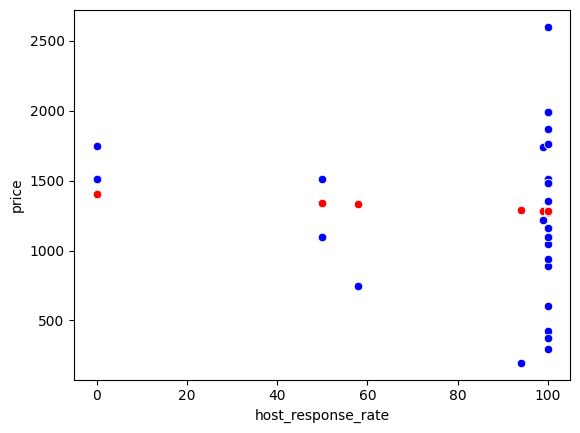

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

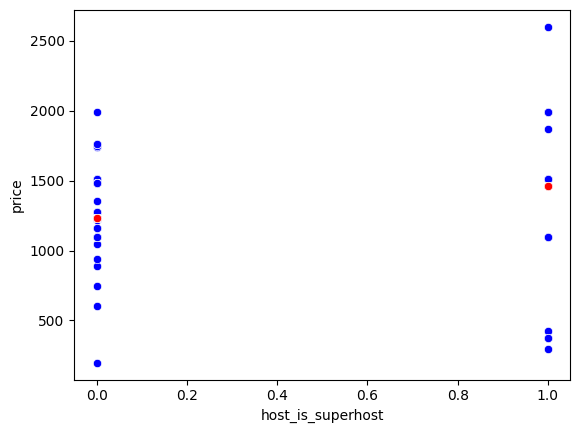

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

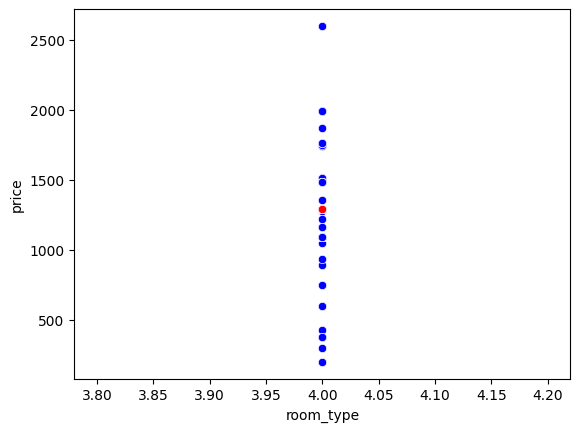

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

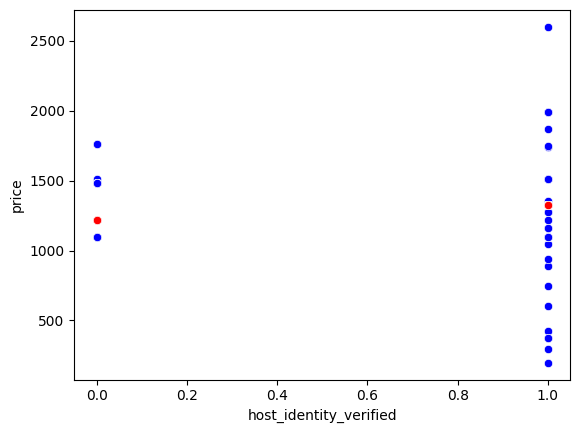

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

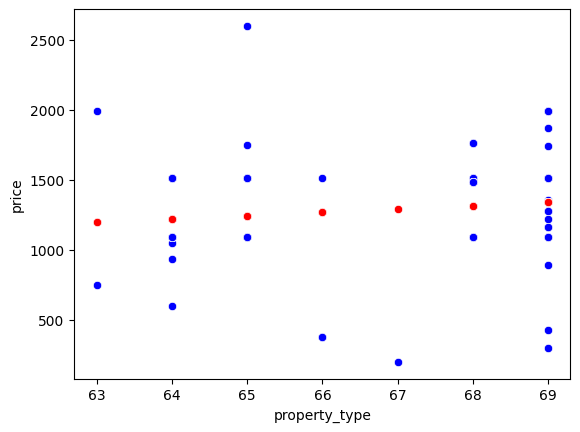

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

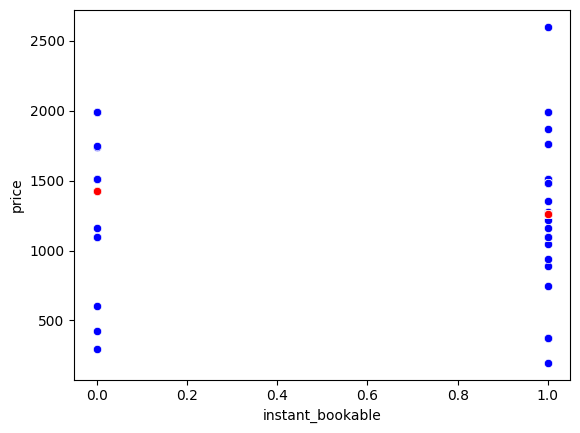

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

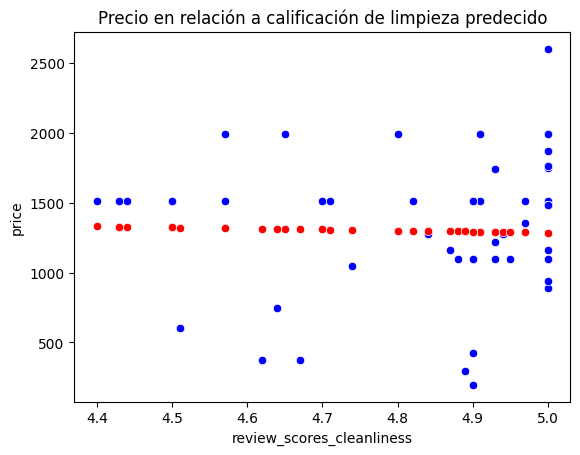

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

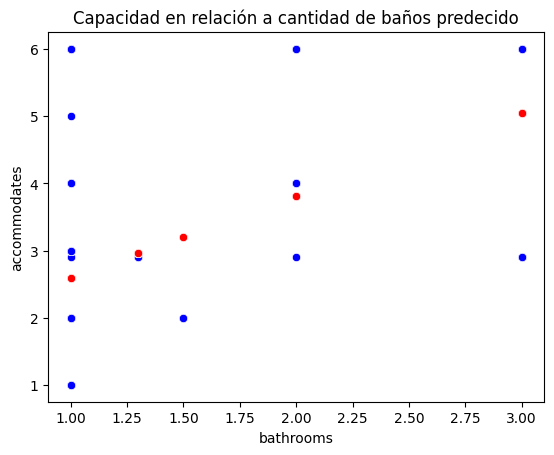

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**Coeficiente de Determinacion**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.00801614253904226

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.08015035963725525

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.02155582197416772

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.015528758212420501

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.03129203223743138

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.0009129211335544563

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.29712134572686355

**Coeficientes de correlacion**

In [60]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08953291316070454)

In [61]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.28310838849680037)

In [62]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.28310838849680037)

In [63]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.14681901094261507)

In [64]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.12461443821813145)

In [65]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.17689554046790262)

In [66]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.030214584782095818)

In [67]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.545088383408474)

In [68]:
#eliminamos room_type y su prediccion 
f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

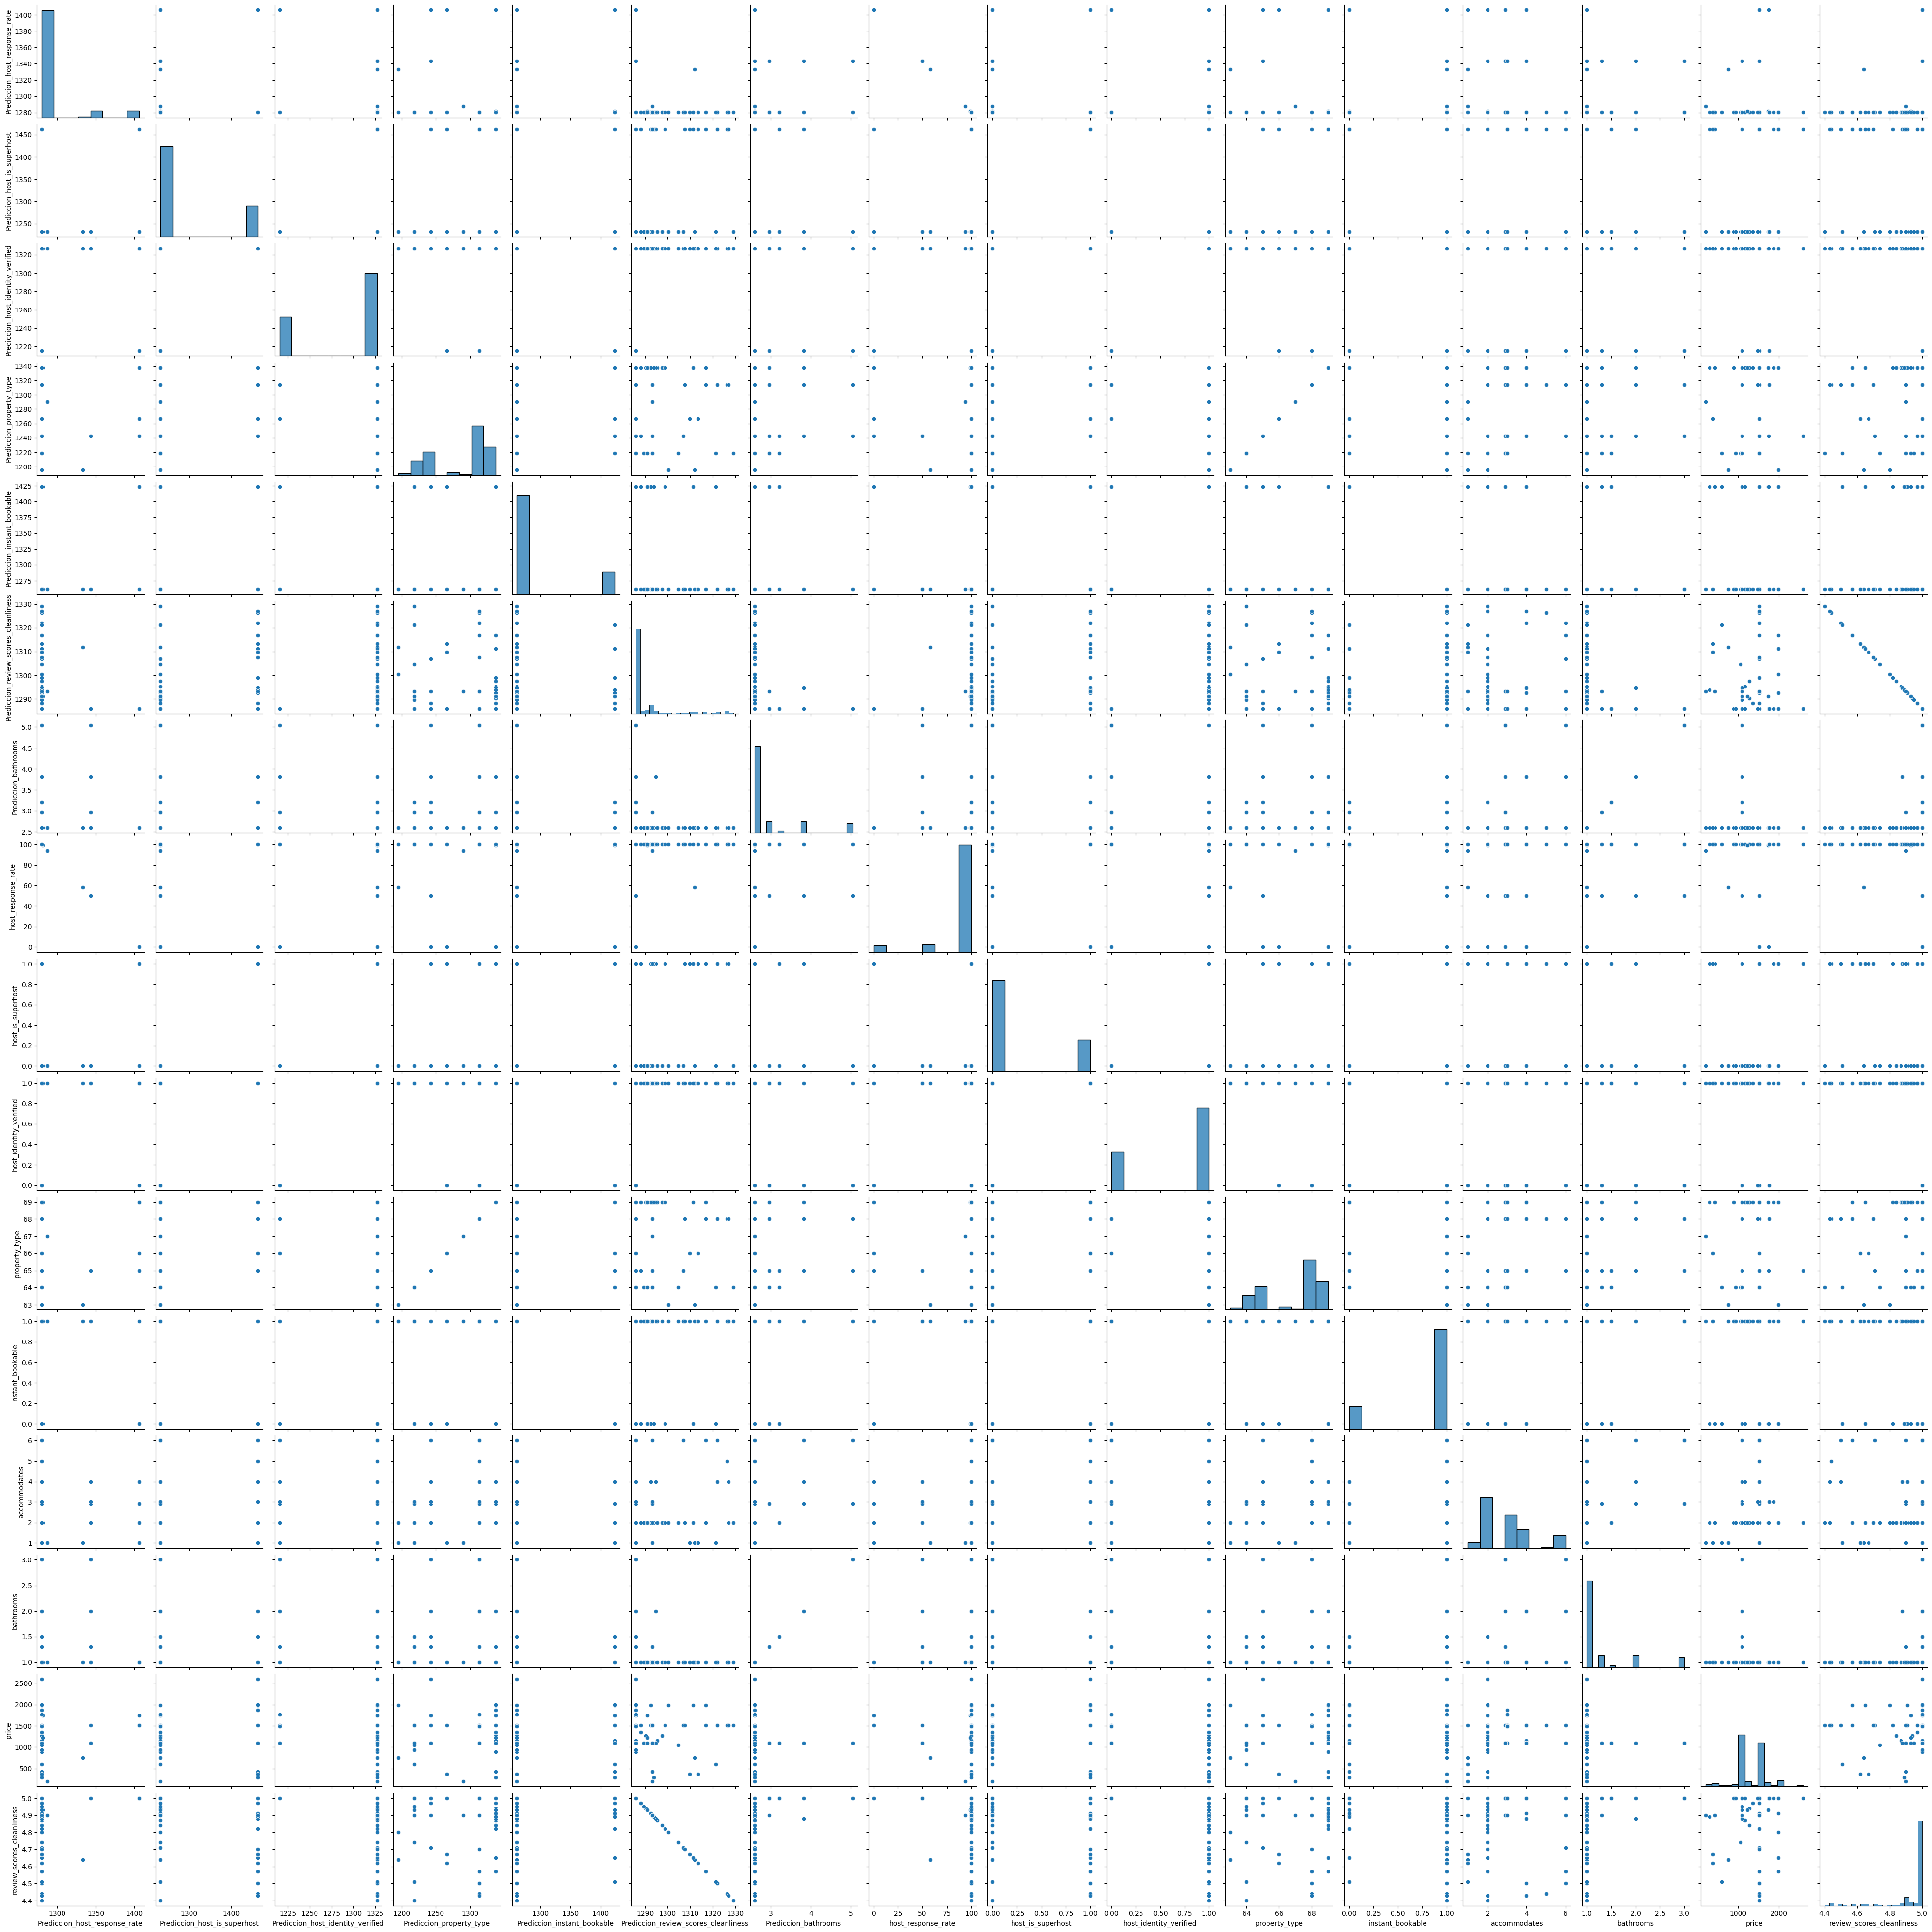

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0        7
50.0       7
58.0       1
94.0       1
99.0       2
100.0    107
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,-0.131898,0.171238,-0.171712,0.326071,-0.136346,-0.085028,-1.000000,-0.131898,0.171238,-0.171712,-0.326071,0.006763,-0.085028,0.089533,0.136346
Prediccion_host_is_superhost,-0.131898,1.000000,0.402396,0.243525,0.241836,0.421740,-0.246347,0.131898,1.000000,0.402396,0.243525,-0.241836,-0.062976,-0.246347,0.283108,-0.421740
Prediccion_host_identity_verified,0.171238,0.402396,1.000000,-0.335485,0.281490,0.334681,-0.538525,-0.171238,0.402396,1.000000,-0.335485,-0.281490,-0.350445,-0.538525,0.146819,-0.334681
Prediccion_property_type,-0.171712,0.243525,-0.335485,1.000000,0.100747,-0.044850,0.153711,0.171712,0.243525,-0.335485,1.000000,-0.100747,0.239563,0.153711,0.124614,0.044850
Prediccion_instant_bookable,0.326071,0.241836,0.281490,0.100747,1.000000,-0.034766,-0.209230,-0.326071,0.241836,0.281490,0.100747,-1.000000,-0.222015,-0.209230,0.176896,0.034766
Prediccion_review_scores_cleanliness,-0.136346,0.421740,0.334681,-0.044850,-0.034766,1.000000,-0.230182,0.136346,0.421740,0.334681,-0.044850,0.034766,-0.024885,-0.230182,0.030215,-1.000000
Prediccion_bathrooms,-0.085028,-0.246347,-0.538525,0.153711,-0.209230,-0.230182,1.000000,0.085028,-0.246347,-0.538525,0.153711,0.209230,0.545088,1.000000,-0.278962,0.230182
host_response_rate,-1.000000,0.131898,-0.171238,0.171712,-0.326071,0.136346,0.085028,1.000000,0.131898,-0.171238,0.171712,0.326071,-0.006763,0.085028,-0.089533,-0.136346
host_is_superhost,-0.131898,1.000000,0.402396,0.243525,0.241836,0.421740,-0.246347,0.131898,1.000000,0.402396,0.243525,-0.241836,-0.062976,-0.246347,0.283108,-0.421740
host_identity_verified,0.171238,0.402396,1.000000,-0.335485,0.281490,0.334681,-0.538525,-0.171238,0.402396,1.000000,-0.335485,-0.281490,-0.350445,-0.538525,0.146819,-0.334681


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.131898,0.171238,0.171712,0.326071,0.136346,0.085028,1.000000,0.131898,0.171238,0.171712,0.326071,0.006763,0.085028,0.089533,0.136346
Prediccion_host_is_superhost,0.131898,1.000000,0.402396,0.243525,0.241836,0.421740,0.246347,0.131898,1.000000,0.402396,0.243525,0.241836,0.062976,0.246347,0.283108,0.421740
Prediccion_host_identity_verified,0.171238,0.402396,1.000000,0.335485,0.281490,0.334681,0.538525,0.171238,0.402396,1.000000,0.335485,0.281490,0.350445,0.538525,0.146819,0.334681
Prediccion_property_type,0.171712,0.243525,0.335485,1.000000,0.100747,0.044850,0.153711,0.171712,0.243525,0.335485,1.000000,0.100747,0.239563,0.153711,0.124614,0.044850
Prediccion_instant_bookable,0.326071,0.241836,0.281490,0.100747,1.000000,0.034766,0.209230,0.326071,0.241836,0.281490,0.100747,1.000000,0.222015,0.209230,0.176896,0.034766
Prediccion_review_scores_cleanliness,0.136346,0.421740,0.334681,0.044850,0.034766,1.000000,0.230182,0.136346,0.421740,0.334681,0.044850,0.034766,0.024885,0.230182,0.030215,1.000000
Prediccion_bathrooms,0.085028,0.246347,0.538525,0.153711,0.209230,0.230182,1.000000,0.085028,0.246347,0.538525,0.153711,0.209230,0.545088,1.000000,0.278962,0.230182
host_response_rate,1.000000,0.131898,0.171238,0.171712,0.326071,0.136346,0.085028,1.000000,0.131898,0.171238,0.171712,0.326071,0.006763,0.085028,0.089533,0.136346
host_is_superhost,0.131898,1.000000,0.402396,0.243525,0.241836,0.421740,0.246347,0.131898,1.000000,0.402396,0.243525,0.241836,0.062976,0.246347,0.283108,0.421740
host_identity_verified,0.171238,0.402396,1.000000,0.335485,0.281490,0.334681,0.538525,0.171238,0.402396,1.000000,0.335485,0.281490,0.350445,0.538525,0.146819,0.334681


<Axes: >

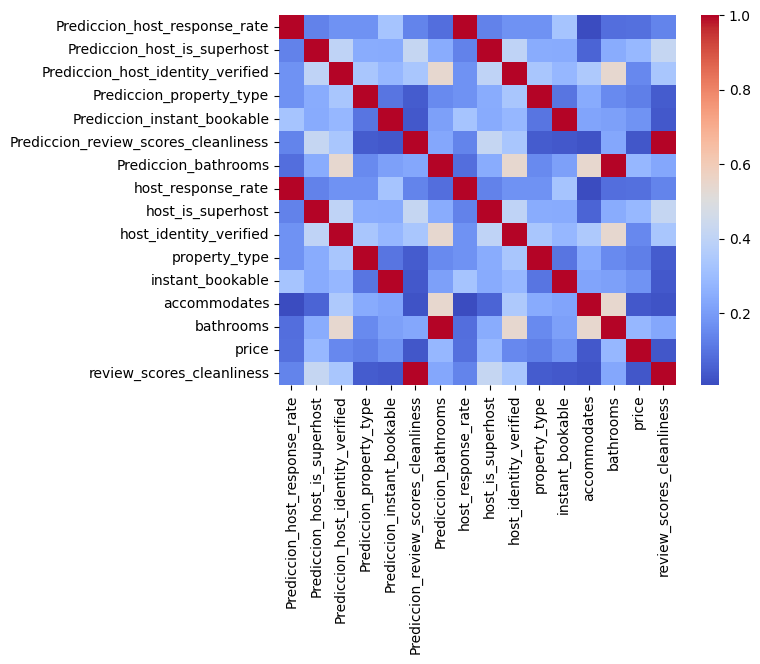

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

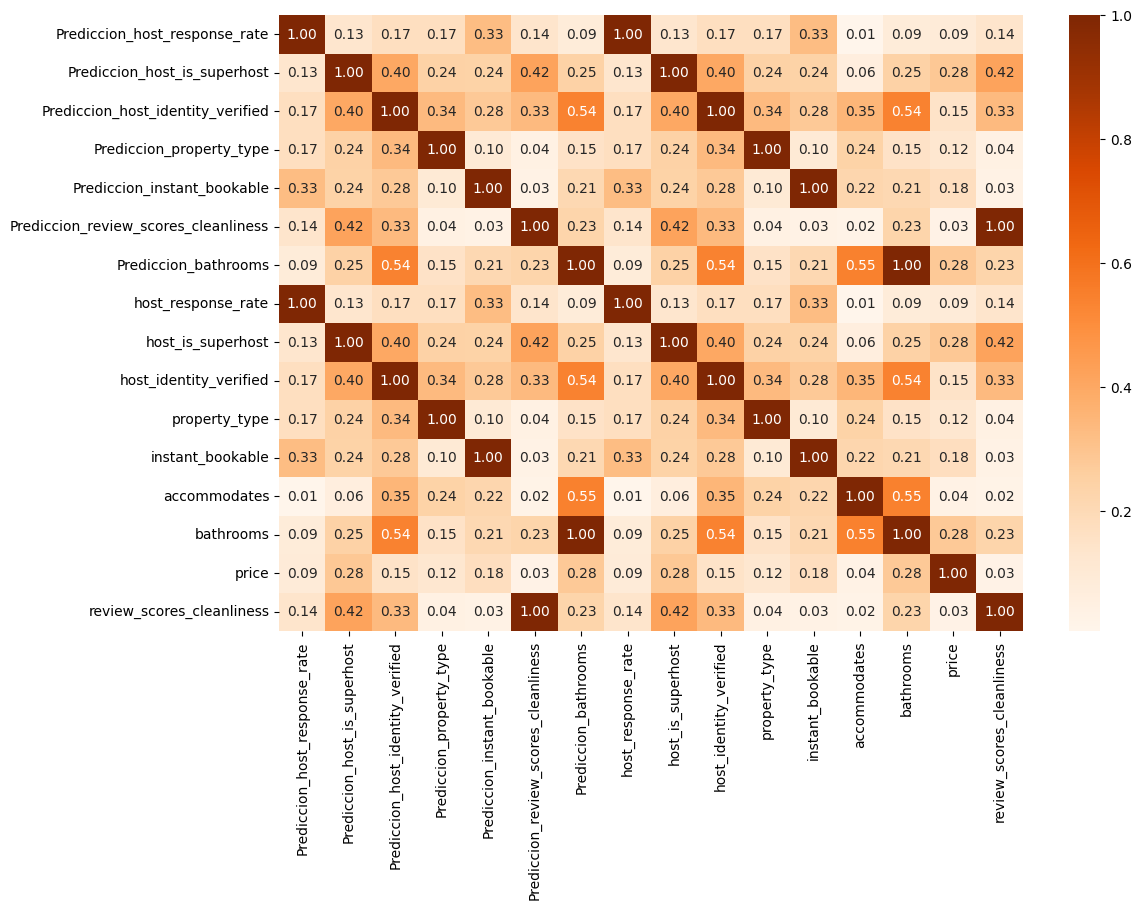

In [74]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
bathrooms: R² = 0.2971
host_is_superhost: R² = 0.0802
instant_bookable: R² = 0.0313
